<a href="https://colab.research.google.com/github/SabilarRosyad/PCVK_GENAP_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MODUL 11-METODE DETEKSI OBJEK: TEMPLATE MATCHING, EDGE DETECTION, CORNER DETECTION, GRID DETECTION, CONTOUR DETECTION

Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

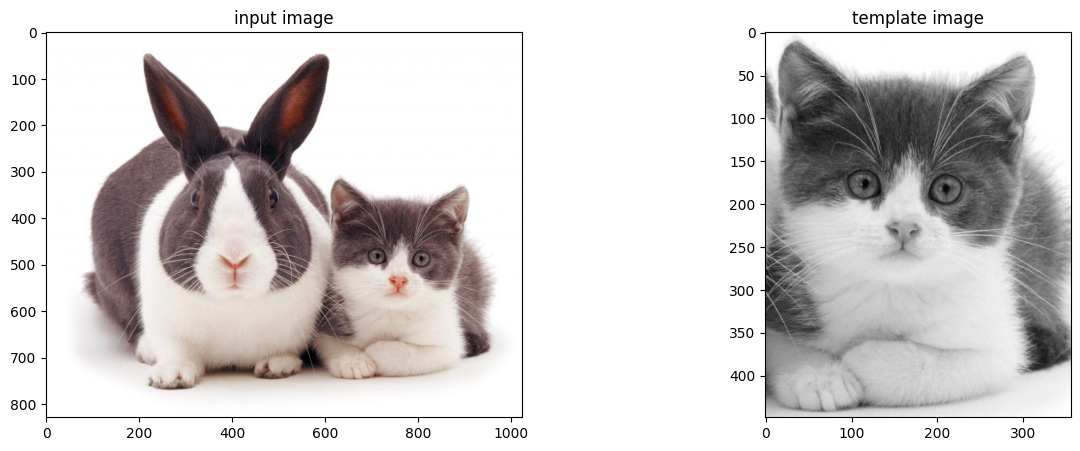

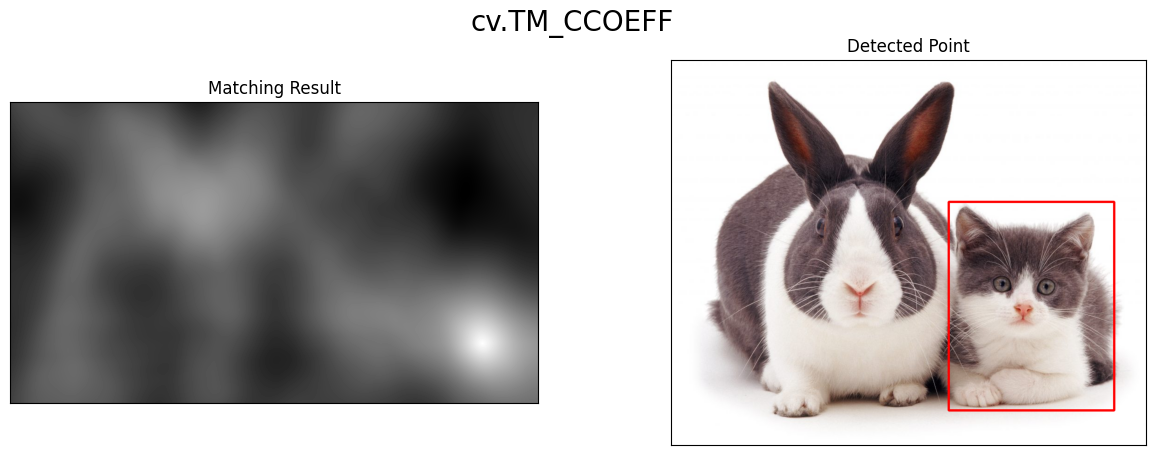

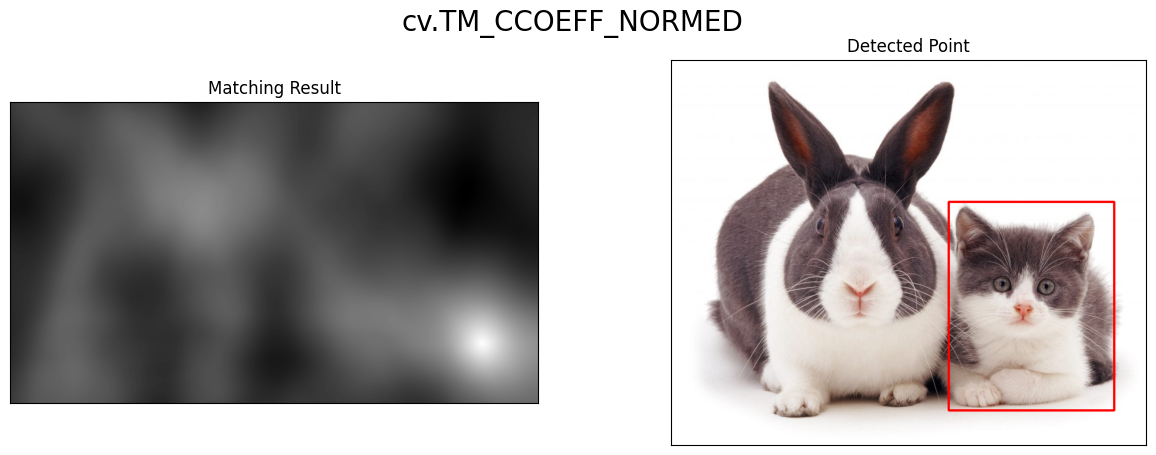

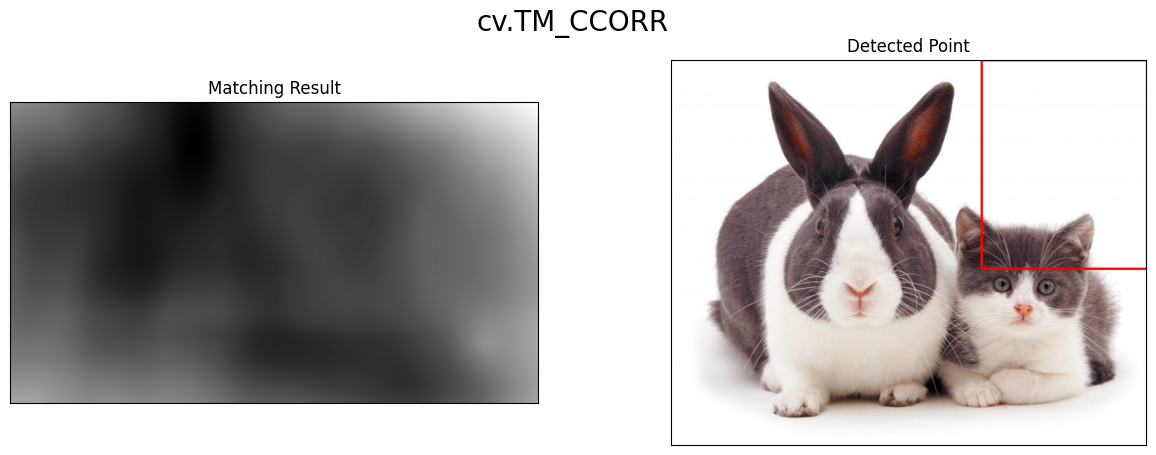

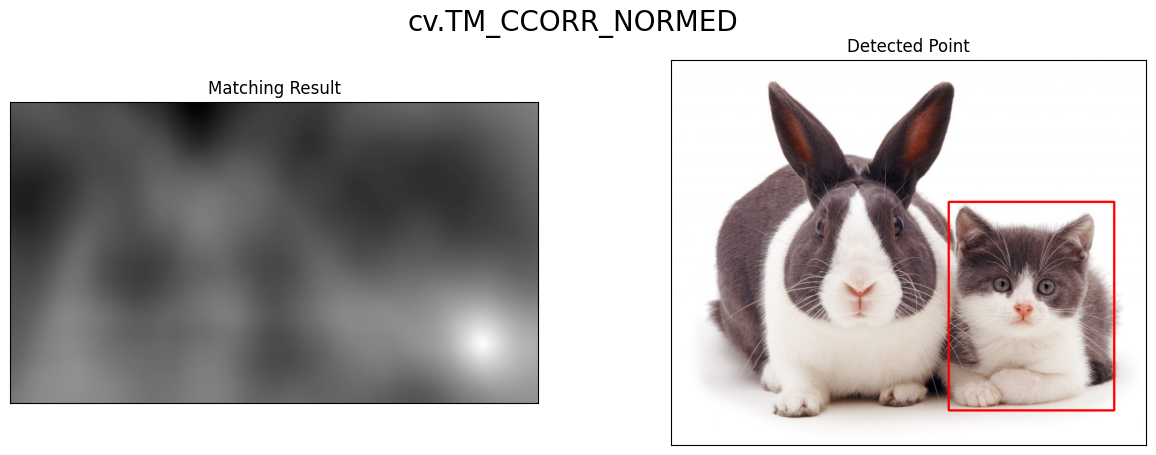

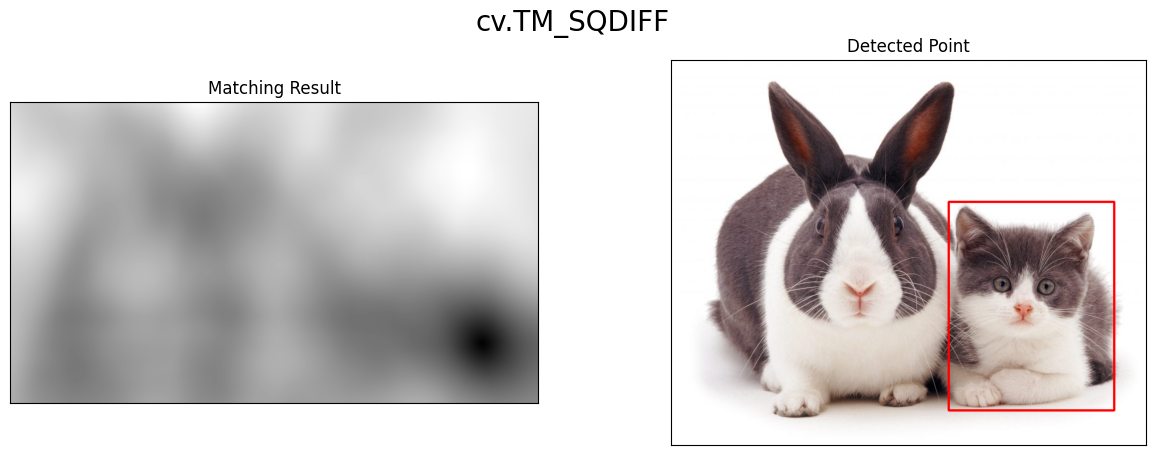

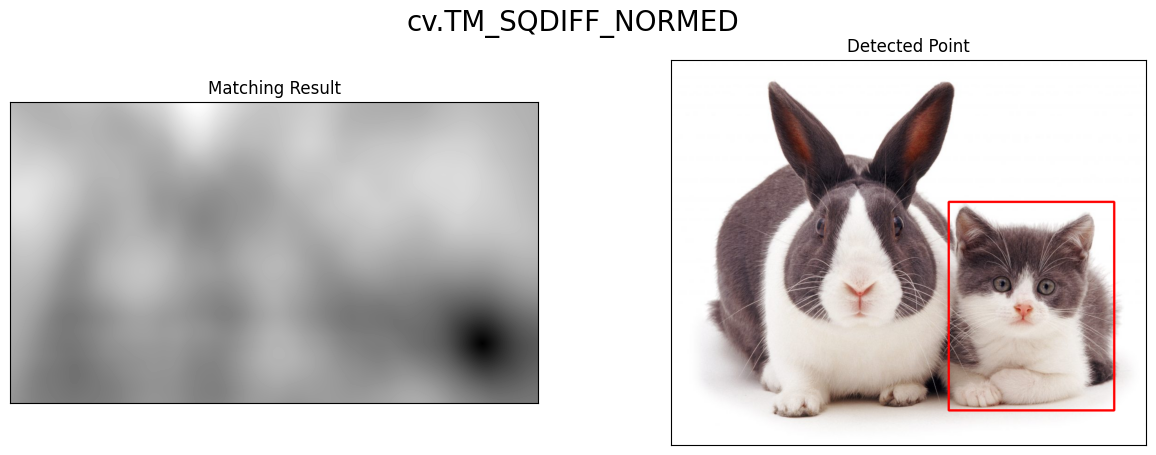

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) # membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

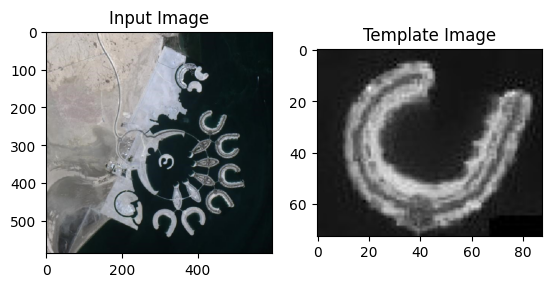

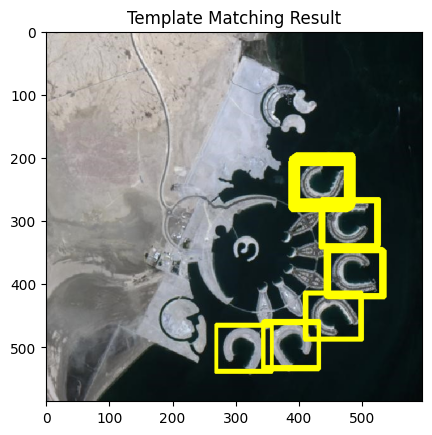

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read the main image and check if it is read successfully
img_rgb = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg')
assert img_rgb is not None, "The file could not be read. Please check the file path and ensure the image exists."

# Convert the main image to grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

# Read the template image and check if it is read successfully
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "The template could not be read. Please check the file path and ensure the image exists."

# Display the input image
plt.subplot(121)
plt.imshow(cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB))
plt.title('Input Image')

# Display the template image
plt.subplot(122)
plt.imshow(template, cmap='gray')
plt.title('Template Image')

# Perform template matching
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)

# Define the threshold for template matching
threshold = 0.43

# Locate the positions where the template matches the image above the threshold
loc = np.where(res >= threshold)

# Draw rectangles around the matched templates
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

# Display the template matching result
plt.figure()  # Create a new figure
plt.imshow(cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB))
plt.title('Template Matching Result')

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian

Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

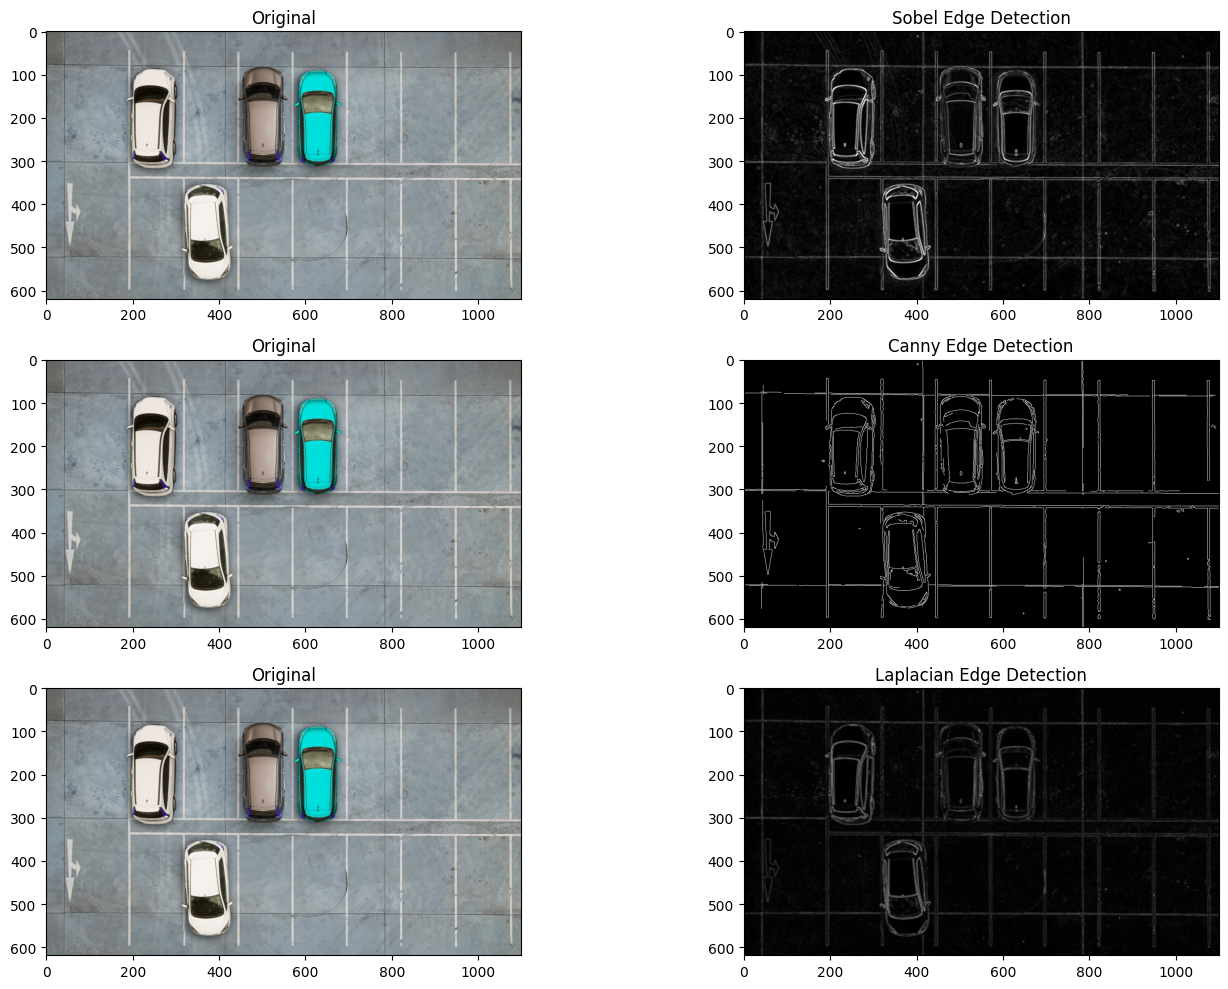

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img0 = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg')
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(gray, (3, 3), 0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

edges_canny = cv.Canny(img, 100, 200)

img_laplacian = cv.Laplacian(img, cv.CV_64F)
img_laplacian = cv.convertScaleAbs(img_laplacian)

# Create a figure with a 3x2 grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Display the original image and Sobel edge detection
axes[0, 0].imshow(img0, cmap='gray', aspect='equal')
axes[0, 0].set_title('Original')

axes[0, 1].imshow(img_sobelxy, cmap='gray', aspect='equal')
axes[0, 1].set_title('Sobel Edge Detection')

# Display the original image and Canny edge detection
axes[1, 0].imshow(img0, cmap='gray', aspect='equal')
axes[1, 0].set_title('Original')

axes[1, 1].imshow(edges_canny, cmap='gray', aspect='equal')
axes[1, 1].set_title('Canny Edge Detection')

# Display the original image and Laplacian edge detection
axes[2, 0].imshow(img0, cmap='gray', aspect='equal')
axes[2, 0].set_title('Original')

axes[2, 1].imshow(img_laplacian, cmap='gray', aspect='equal')
axes[2, 1].set_title('Laplacian Edge Detection')

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:

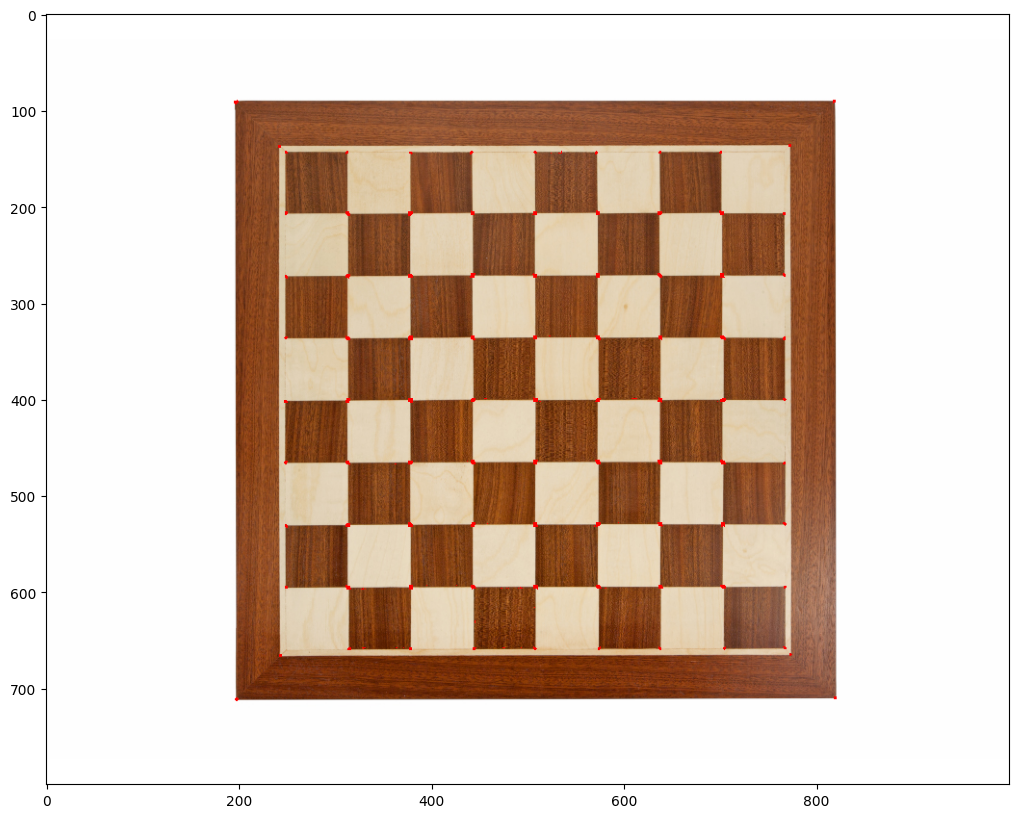

In [8]:
#Harris Corner Detection

#load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

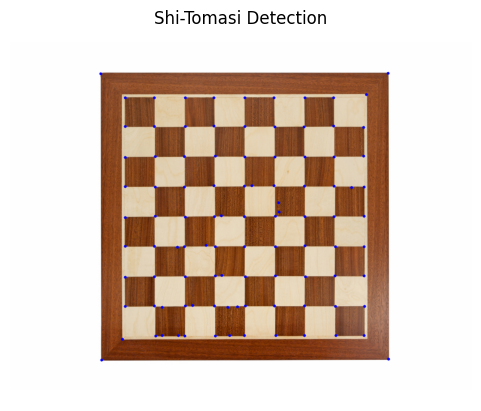

In [9]:
#shi - thomasi

# Baca gambar chess-board.jpg
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Metode Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Konversi koordinat titik sudut ke bilangan bulat
corners = np.int0(corners)

# Gambar lingkaran pada setiap sudut yang ditemukan
for corner in corners:
    x, y = corner.ravel()
    cv.circle(img, (x, y), 3, 255, -1)

# Tampilkan hasil Shi-Tomasi Detection
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')
plt.axis('off')
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


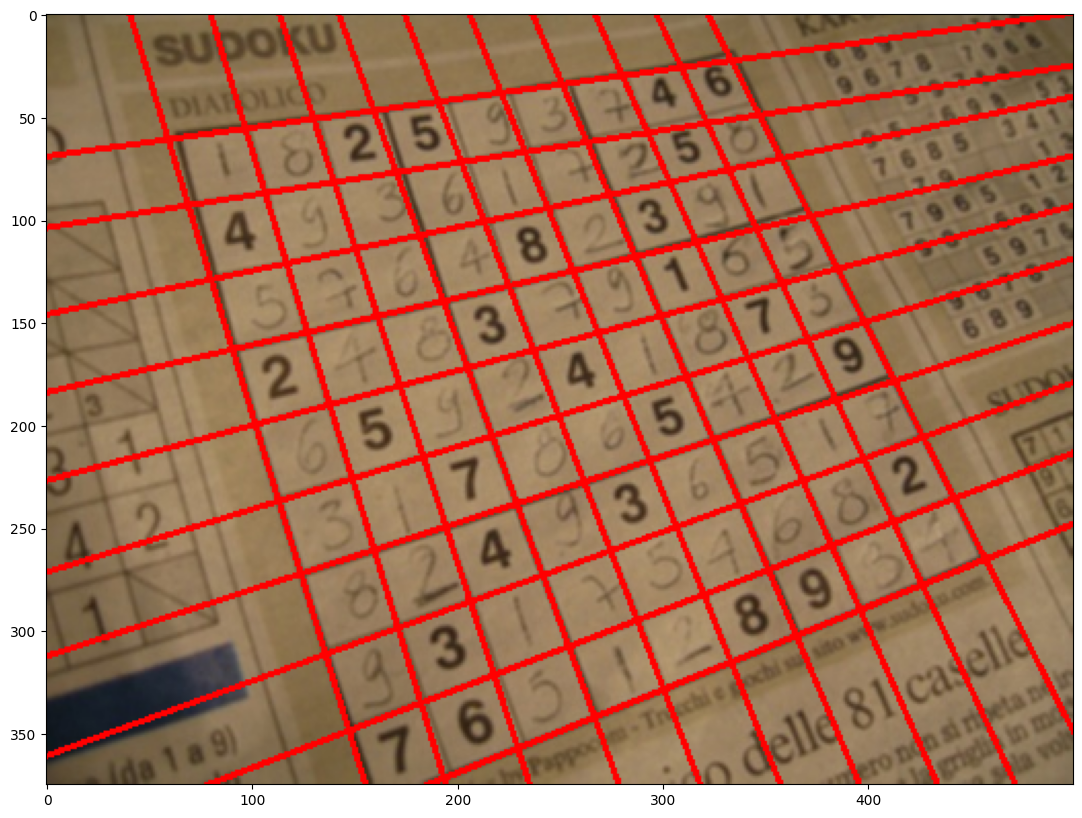

In [10]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

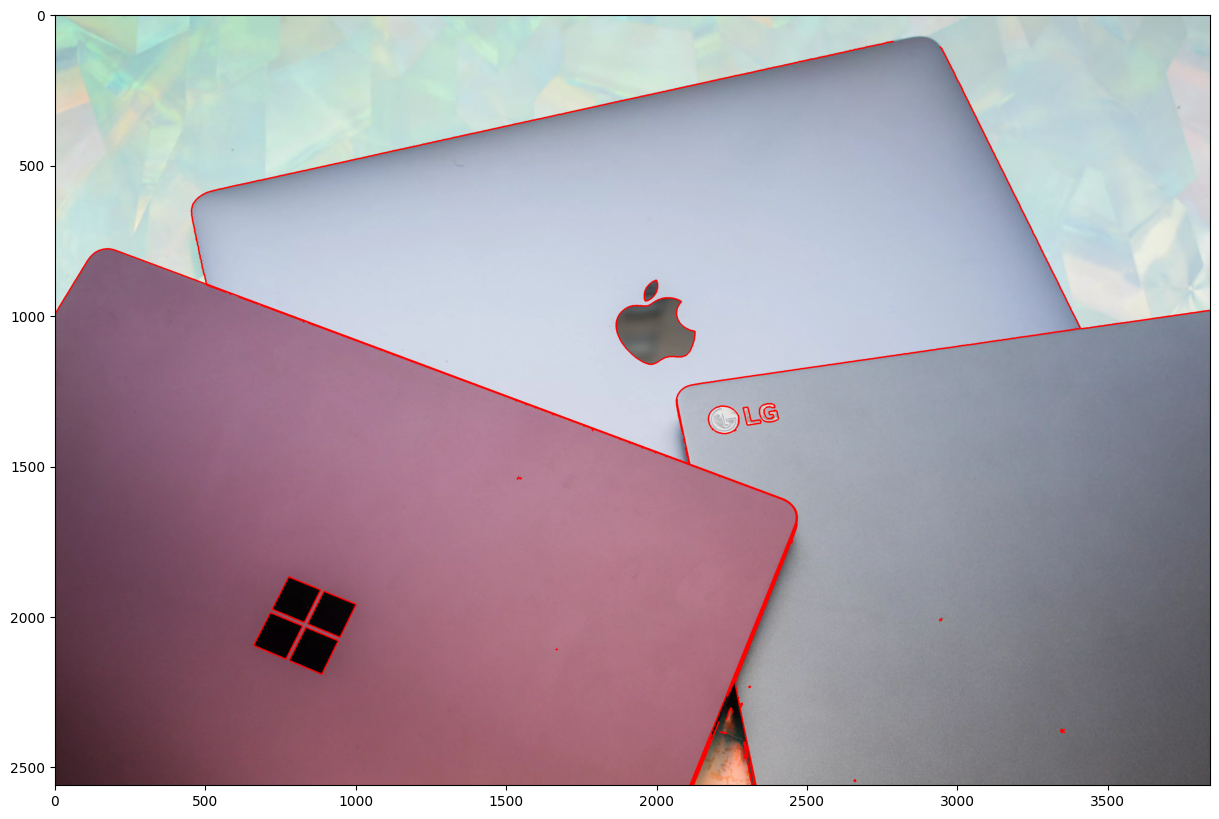

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## E. Pengayaan Materi KTP


1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

2. Muat 2 library berikut sebagai tahapan persiapan

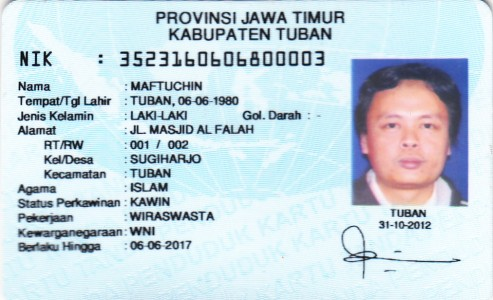

In [12]:
import cv2
from google.colab.patches import cv2_imshow
import os

image = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')
cv2_imshow(image)

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [13]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/KTP_More"
image = "ktp4.png"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, image))
    blurred = src.copy()
    gray = blurred.copy()

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [14]:
# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

168.0 (300, 493)


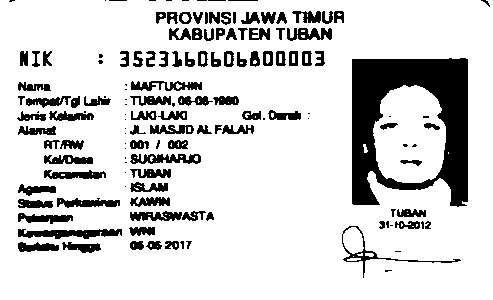

In [15]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
cv2_imshow(bw)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

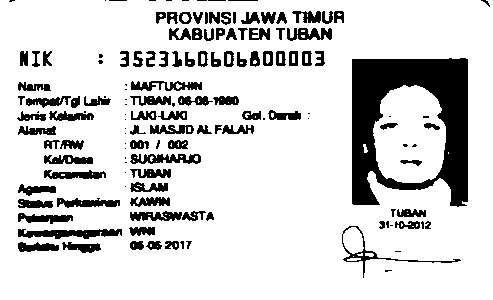

In [16]:
# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)

# Display the result after morphological operations
cv2_imshow(bw_opened)

7.
Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

168.0 (300, 493)


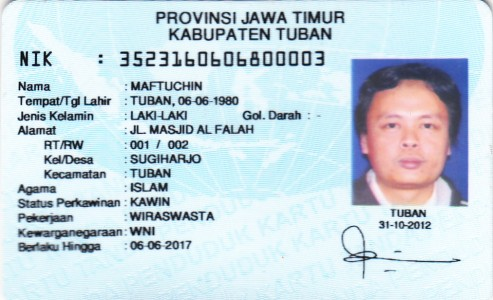

In [17]:
import cv2
from google.colab.patches import cv2_imshow

# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/KTP_More"
image = "ktp4.png"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, image))
    blurred = src.copy()
    gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur
cv2_imshow(src)

## F. Tugas Praktikum

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:

Kelompok 4 – KTP Edo Nias